In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cal19=pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\calendar_2019.csv.gz")
cal17=pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\calendar_2017.csv.gz")
cal18=pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\calendar_2018.csv.gz")

In [3]:
listings2019 = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\listings_2019.csv.gz")
listings2018 = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\listings_2018.csv.gz")
listings2017 = pd.read_csv("C:\\Users\\vaide\\Documents\\575\\Group_Project\\Data\\Data\\listings_2017.csv.gz")

In [4]:
set_19 = set(listings2019.id)
set_18 = set(listings2018.id)
set_17 = set(listings2017.id)

listings2018['drop_out'] = listings2018['id'].apply(lambda x: 0 if x in set_19 else 1)
listings2017['drop_out'] = listings2017['id'].apply(lambda x: 0 if x in set_18 else 1)

In [5]:
listings2018.drop_out.value_counts()

0    5246
1    3348
Name: drop_out, dtype: int64

In [6]:
listings2017.shape

(3818, 93)

In [7]:
cal17
cal17['avail']=np.where(cal17.available=='t',1,0)
avail17=pd.DataFrame(cal17.avail.groupby(cal17.listing_id).sum())
avail17=avail17.reset_index()
avail17.columns=["listing_id","days_avail"]
merge17=pd.merge(avail17,listings2017, how='inner', left_on=['listing_id'], right_on=['id'])
drop17=merge17[["id","days_avail","drop_out"]]
d17_dropped=drop17.loc[drop17["drop_out"]==1]
d17_there = drop17.loc[drop17["drop_out"]==0]

d17_dropped = d17_dropped.drop(axis =1 ,columns = 'drop_out')
d17_there = d17_there.drop(axis =1 ,columns = 'drop_out')


cal18
cal18['avail']=np.where(cal18.available=='t',1,0)
avail18=pd.DataFrame(cal18.avail.groupby(cal18.listing_id).sum())
avail18=avail18.reset_index()
avail18.columns=["listing_id","days_avail"]
merge18=pd.merge(avail18,listings2018, how='inner', left_on=['listing_id'], right_on=['id'])
drop18=merge18[["id","days_avail","drop_out"]]
d18_dropped=drop18.loc[drop18["drop_out"]==1]
d18_there = drop18.loc[drop18["drop_out"]==0]

d18_dropped = d18_dropped.drop(axis =1 ,columns = 'drop_out')
d18_there = d18_there.drop(axis =1 ,columns = 'drop_out')



In [8]:
d18_dropped

,id,days_avail
1,3335,365
2,4291,346
11,10209,362
12,10385,335
13,10695,335
...,...,...
8581,30737191,83
8584,30741325,81
8585,30745238,16
8588,30761790,315


In [9]:
dropped_merged_df = pd.concat([d17_dropped,d18_dropped], axis = 0)
there_merged_df = pd.concat([d17_there,d18_there], axis = 0)

pd_dropped_merged =pd.DataFrame(dropped_merged_df.groupby("days_avail").count())
pd_dropped_merged=pd_dropped_merged.reset_index()
pd_dropped_merged.columns=["days","freq"]

pd_there_merged =pd.DataFrame(there_merged_df.groupby("days_avail").count())
pd_there_merged=pd_there_merged.reset_index()
pd_there_merged.columns=["days","freq"]

In [10]:
pd17_there_buc = pd.DataFrame()
pd17_there_buc['Range'] = ["0","1","2","3","4","5","6","7","8","9","10","11","12"]

freq = []
temp = pd_there_merged[(pd_there_merged["days"] == 0)]
freq.append(temp.freq.sum())
count = 0
for i in range(12):
    if(i == 11):
        temp = pd_there_merged[(pd_there_merged["days"] > count) & (pd_there_merged["days"] < 366)] 
    else:
        temp = pd_there_merged[(pd_there_merged["days"] > count) & (pd_there_merged["days"] < count + 31)] 
    freq.append(temp.freq.sum())
    count = count + 30
pd17_there_buc['frequency'] = freq
pd17_there_buc

,Range,frequency
0,0,976
1,1,430
2,2,379
3,3,788
4,4,402
5,5,442
6,6,659
7,7,138
8,8,197
9,9,284


In [11]:
pd17_drop_buc = pd.DataFrame()
pd17_drop_buc['Range'] = ["0","1","2","3","4","5","6","7","8","9","10","11","12"]
freq = []
temp = pd_dropped_merged[(pd_dropped_merged["days"] == 0)]
freq.append(temp.freq.sum())
count = 0
for i in range(12):
    if(i == 11):
        temp = pd_dropped_merged[(pd_dropped_merged["days"] > count) & (pd_dropped_merged["days"] < 366)] 
    else:
        temp = pd_dropped_merged[(pd_dropped_merged["days"] > count) & (pd_dropped_merged["days"] < count + 31)] 
    freq.append(temp.freq.sum())
    count = count + 30
pd17_drop_buc['frequency'] = freq
pd17_drop_buc

,Range,frequency
0,0,822
1,1,606
2,2,343
3,3,616
4,4,251
5,5,208
6,6,346
7,7,88
8,8,113
9,9,210


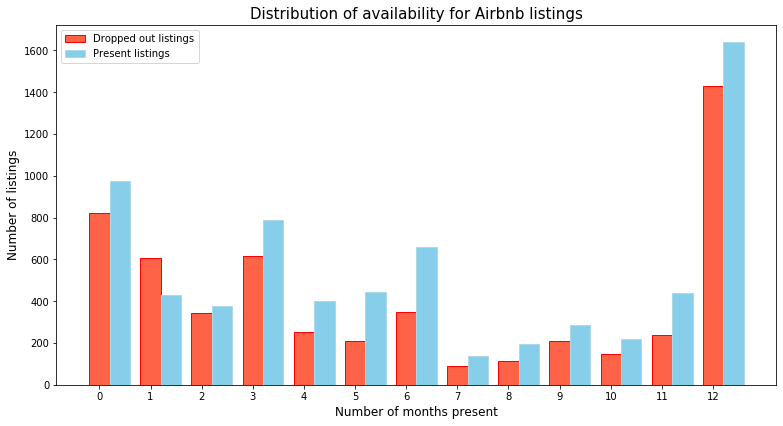

In [12]:
#Plotting availaibiltiy
X = np.arange(13)
fig=plt.gcf()
fig.set_size_inches(10,5)
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, pd17_drop_buc["frequency"], color = 'tomato', edgecolor='r', linewidth = 1, width = 0.40, label ='Dropped out listings')
ax.bar(X + 0.40, pd17_there_buc["frequency"], color = 'skyblue', edgecolor='lightblue', linewidth = 1,width = 0.40,label ='Present listings')
plt.title("Distribution of availability for Airbnb listings", fontsize =15)
#plt.xticks(rotation=45)
plt.xlabel("Number of months present", fontsize =12)
plt.ylabel("Number of listings", fontsize =12)
plt.xticks(X,pd17_drop_buc.Range)
plt.legend()